In [1]:
import pandas as pd
import numpy as np

In [7]:
product = {'Week' : [1,2,3,4,5,6,7,8,9,10,11,12],'demand':[290,260,288,300,310,303,329,340,316,330,308,310]}

In [8]:
df = pd.DataFrame(product)

In [9]:
df.head()

,Week,demand
0,1,290
1,2,260
2,3,288
3,4,300
4,5,310


# Simple Moving Average (SMA) with Window size of 3

In [10]:
for i in range(0,df.shape[0]-2):
    df.loc[df.index[i+2],'SMA_3'] = np.round(((df.iloc[i,1]+ df.iloc[i+1,1] +df.iloc[i+2,1])/3),1)

In [11]:
df.head()

,Week,demand,SMA_3
0,1,290,NaN
1,2,260,NaN
2,3,288,279.3
3,4,300,282.7
4,5,310,299.3


# Simple Moving Average (SMA) with Window size of 4

In [12]:
df['pandas_SMA_3'] = df.iloc[:,1].rolling(window=3).mean()

In [13]:
df.head()

,Week,demand,SMA_3,pandas_SMA_3
0,1,290,NaN,NaN
1,2,260,NaN,NaN
2,3,288,279.3,279.333333
3,4,300,282.7,282.666667
4,5,310,299.3,299.333333


In [14]:
for i in range(0,df.shape[0]-3):
    df.loc[df.index[i+3],'SMA_4'] = np.round(((df.iloc[i,1]+ df.iloc[i+1,1] +df.iloc[i+2,1]+df.iloc[i+3,1])/4),1)

In [15]:
df.head()

,Week,demand,SMA_3,pandas_SMA_3,SMA_4
0,1,290,NaN,NaN,NaN
1,2,260,NaN,NaN,NaN
2,3,288,279.3,279.333333,NaN
3,4,300,282.7,282.666667,284.5
4,5,310,299.3,299.333333,289.5


In [16]:
df['pandas_SMA_4'] = df.iloc[:,1].rolling(window=4).mean()

In [17]:
df.head()

,Week,demand,SMA_3,pandas_SMA_3,SMA_4,pandas_SMA_4
0,1,290,NaN,NaN,NaN,NaN
1,2,260,NaN,NaN,NaN,NaN
2,3,288,279.3,279.333333,NaN,NaN
3,4,300,282.7,282.666667,284.5,284.5
4,5,310,299.3,299.333333,289.5,289.5


In [18]:
import matplotlib.pyplot as plt
%matplotlib inline

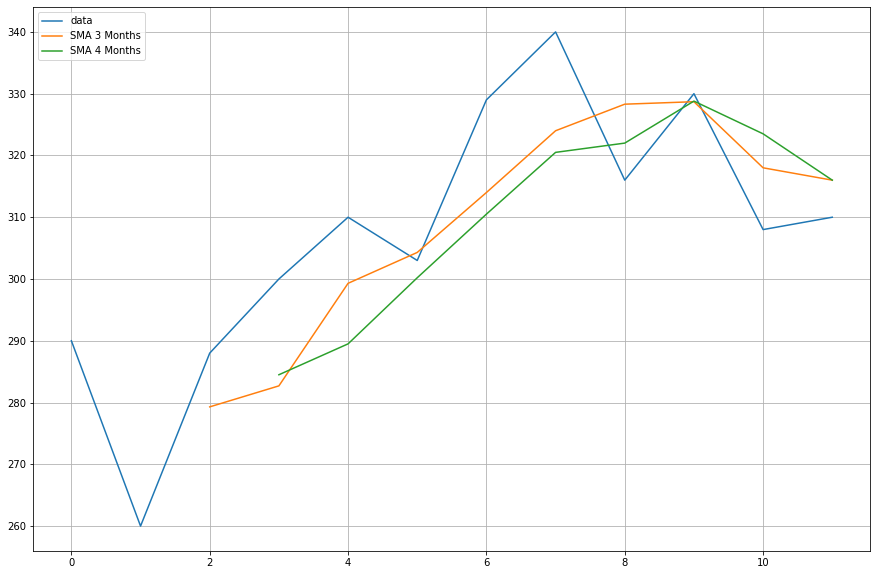

In [19]:
plt.figure(figsize=[15,10])
plt.grid(True)
plt.plot(df['demand'],label='data')
plt.plot(df['SMA_3'],label='SMA 3 Months')
plt.plot(df['SMA_4'],label='SMA 4 Months')
plt.legend(loc=2)

In [20]:
print(df)

    Week  demand  SMA_3  pandas_SMA_3  SMA_4  pandas_SMA_4
0      1     290    NaN           NaN    NaN           NaN
1      2     260    NaN           NaN    NaN           NaN
2      3     288  279.3    279.333333    NaN           NaN
3      4     300  282.7    282.666667  284.5        284.50
4      5     310  299.3    299.333333  289.5        289.50
5      6     303  304.3    304.333333  300.2        300.25
6      7     329  314.0    314.000000  310.5        310.50
7      8     340  324.0    324.000000  320.5        320.50
8      9     316  328.3    328.333333  322.0        322.00
9     10     330  328.7    328.666667  328.8        328.75
10    11     308  318.0    318.000000  323.5        323.50
11    12     310  316.0    316.000000  316.0        316.00


In [22]:
absolute_error_SMA3 = [288-279.3, 300-282.7, 310-299.3, 303-304.3, 329-314.0, 340-324.0, 316-328.3, 330-328.7, 308-318.0, 310-316.0]

In [23]:
print(absolute_error_SMA3)

[8.699999999999989, 17.30000000000001, 10.699999999999989, -1.3000000000000114, 15.0, 16.0, -12.300000000000011, 1.3000000000000114, -10.0, -6.0]


In [24]:
series = pd.Series(absolute_error_SMA3)
mean_absolute_deviation = series.mad()

In [25]:
print(mean_absolute_deviation)

9.6
